## Importacion y carga de DataSet

In [9]:
import os
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
import warnings
import sqlite3
import plotly.express as px


In [10]:
#Etraer los datos a utilizar en formato csv
try:    
    
    df_FondosInversion_colectiva = pd.read_csv("C:/Users/migue/Music/MINTIC/mintic/modulo1/fuente de datos/Rentabilidades_de_los_Fondos_de_Inversi_n_Colectiva__FIC__20240914.csv")	
    print("Se cargo exitosamente la fuente de datos")

#Error en la lectura del archivo
except FileExistsError as e:
    print("Error encontrado: ",e)
    
#Cualquier otro tipo de error
except Exception as e:
    print("Error: ",e)

Se cargo exitosamente la fuente de datos


# Validación de los Datos

*Formateo de decimales*

In [11]:
pd.set_option('display.float_format', lambda x: '%.1f' % x) # permite que se configure la visualización de datos en un dataframe con un solo decimal

# Validación aleatoria del Data Frame
df_FondosInversion_colectiva.sample(5)

,FECHA_CORTE,TIPO_ENTIDAD,NOMBRE_TIPO_ENTIDAD,CODIGO_ENTIDAD,NOMBRE_ENTIDAD,TIPO_NEGOCIO,NOMBRE_TIPO_PATRIMONIO,SUBTIPO_NEGOCIO,NOMBRE_SUBTIPO_PATRIMONIO,CODIGO_NEGOCIO,...,VALOR_UNIDAD_OPERACIONES_DIA_T,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL
1436478,19/10/2021,5,SF-SOCIEDAD FIDUCIARIA,39,Sociedad Fiduciaria De Desarrollo Agropecuario...,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,69537,...,9994.1,0.0,0.0,0.0,49970564870.4,1.0,-7.0,0.0,0.0,0.0
849847,02/07/2018,85,COMISIONISTAS DE BOLSA DE VALORES,26,Corredores Davivienda S.A.Comisionista De Bolsa,9,FONDOS DE INVERSIÓN COLECTIVA,7,FONDOS DE CAPITAL PRIVADO,76407,...,9992.9,0.0,0.0,0.0,98732143723.3,2.0,0.0,0.0,0.0,0.0
977136,02/08/2022,5,SF-SOCIEDAD FIDUCIARIA,16,Alianza Fiduciaria S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,7,FONDOS DE CAPITAL PRIVADO,95663,...,16514.3,0.0,0.0,0.0,100693875852.9,2.0,0.0,13.4,22.8,31.1
1894207,01/07/2024,5,SF-SOCIEDAD FIDUCIARIA,39,Sociedad Fiduciaria De Desarrollo Agropecuario...,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,117825,...,10539.8,0.0,0.0,0.0,651966631332.2,3.0,9.0,8.7,9.8,0.0
870293,20/06/2018,5,SF-SOCIEDAD FIDUCIARIA,38,Fiduciaria Central S.A. Sigla Fiducentral S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,7,FONDOS DE CAPITAL PRIVADO,77640,...,12439.4,0.0,0.0,0.0,85574977632.6,84.0,-0.3,0.1,-0.3,10.3


*Conteo de columnas y filas*

In [12]:
# Conteo de columnas y filas
num_rows,num_cols = df_FondosInversion_colectiva.shape

print(f"Datos del dataframe: \nFilas:{num_rows} \nColumnas: {num_cols}")

Datos del dataframe: 
Filas:2165934 
Columnas: 26


*Validación de nombres de columnas*

In [13]:
# Validación nombres de las columnas
df_FondosInversion_colectiva.columns

Index(['FECHA_CORTE', 'TIPO_ENTIDAD', 'NOMBRE_TIPO_ENTIDAD', 'CODIGO_ENTIDAD',
       'NOMBRE_ENTIDAD', 'TIPO_NEGOCIO', 'NOMBRE_TIPO_PATRIMONIO',
       'SUBTIPO_NEGOCIO', 'NOMBRE_SUBTIPO_PATRIMONIO', 'CODIGO_NEGOCIO',
       'NOMBRE_PATRIMONIO', 'PRINCIPAL_COMPARTIMENTO', 'TIPO_PARTICIPACION',
       'RENDIMIENTOS_ABONADOS', 'PRECIERRE_FONDO_DIA_T',
       'NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR',
       'VALOR_UNIDAD_OPERACIONES_DIA_T', 'APORTES_RECIBIDOS',
       'RETIROS_REDENCIONES', 'ANULACIONES', 'VALOR_FONDO_CIERRE_DIA_T',
       'NUMERO_INVERSIONISTAS', 'RENTABILIDAD_DIARIA', 'RENTABILIDAD_MENSUAL',
       'RENTABILIDAD_SEMESTRAL', 'RENTABILIDAD_ANUAL'],
      dtype='object')

*Validacion de datos nulos por cada columna*

In [14]:
# Conteo da datos nullos
print(df_FondosInversion_colectiva.isna().sum())

FECHA_CORTE                                         0
TIPO_ENTIDAD                                        0
NOMBRE_TIPO_ENTIDAD                                 0
CODIGO_ENTIDAD                                      0
NOMBRE_ENTIDAD                                      0
TIPO_NEGOCIO                                        0
NOMBRE_TIPO_PATRIMONIO                              0
SUBTIPO_NEGOCIO                                     0
NOMBRE_SUBTIPO_PATRIMONIO                           0
CODIGO_NEGOCIO                                      0
NOMBRE_PATRIMONIO                                   0
PRINCIPAL_COMPARTIMENTO                             0
TIPO_PARTICIPACION                                  0
RENDIMIENTOS_ABONADOS                               0
PRECIERRE_FONDO_DIA_T                               0
NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR    0
VALOR_UNIDAD_OPERACIONES_DIA_T                      0
APORTES_RECIBIDOS                                   0
RETIROS_REDENCIONES         

*Validacion de datos NO nulos por cada columna*

In [15]:
# Conteo de datos no nullos
print(df_FondosInversion_colectiva.notna().sum())

FECHA_CORTE                                         2165934
TIPO_ENTIDAD                                        2165934
NOMBRE_TIPO_ENTIDAD                                 2165934
CODIGO_ENTIDAD                                      2165934
NOMBRE_ENTIDAD                                      2165934
TIPO_NEGOCIO                                        2165934
NOMBRE_TIPO_PATRIMONIO                              2165934
SUBTIPO_NEGOCIO                                     2165934
NOMBRE_SUBTIPO_PATRIMONIO                           2165934
CODIGO_NEGOCIO                                      2165934
NOMBRE_PATRIMONIO                                   2165934
PRINCIPAL_COMPARTIMENTO                             2165934
TIPO_PARTICIPACION                                  2165934
RENDIMIENTOS_ABONADOS                               2165934
PRECIERRE_FONDO_DIA_T                               2165934
NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR    2165934
VALOR_UNIDAD_OPERACIONES_DIA_T          

*Tipo de dato por cada columna*

In [16]:
# Validación de tipos de datos en cada columna
df_FondosInversion_colectiva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165934 entries, 0 to 2165933
Data columns (total 26 columns):
 #   Column                                            Dtype  
---  ------                                            -----  
 0   FECHA_CORTE                                       object 
 1   TIPO_ENTIDAD                                      int64  
 2   NOMBRE_TIPO_ENTIDAD                               object 
 3   CODIGO_ENTIDAD                                    int64  
 4   NOMBRE_ENTIDAD                                    object 
 5   TIPO_NEGOCIO                                      int64  
 6   NOMBRE_TIPO_PATRIMONIO                            object 
 7   SUBTIPO_NEGOCIO                                   int64  
 8   NOMBRE_SUBTIPO_PATRIMONIO                         object 
 9   CODIGO_NEGOCIO                                    int64  
 10  NOMBRE_PATRIMONIO                                 object 
 11  PRINCIPAL_COMPARTIMENTO                           int64  
 12  

*Formateo para la "FECHA_CORTE" a formato %d/%m/%Y*

In [17]:
# Formateo del tipo de fecha
df_FondosInversion_colectiva['FECHA_CORTE'] = pd.to_datetime(df_FondosInversion_colectiva['FECHA_CORTE'])


C:\Users\migue\AppData\Local\Temp\ipykernel_22768\1283088305.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_FondosInversion_colectiva['FECHA_CORTE'] = pd.to_datetime(df_FondosInversion_colectiva['FECHA_CORTE'])


*Validación de fecha mínima y máxima*

In [18]:
# Validación de la fecha máxima y mínima de los datos
print(f"Fecha máxima: {df_FondosInversion_colectiva['FECHA_CORTE'].max()}")
print(f"Fecha mínima: {df_FondosInversion_colectiva['FECHA_CORTE'].min()}")

Fecha máxima: 2024-09-11 00:00:00
Fecha mínima: 2016-01-01 00:00:00


*Visualización de todas las columnas*

In [19]:
pd.set_option('display.max_columns', None) ## para que me muestre todas las columnas que vienen desde el dataset 
df_FondosInversion_colectiva.sample(5)

,FECHA_CORTE,TIPO_ENTIDAD,NOMBRE_TIPO_ENTIDAD,CODIGO_ENTIDAD,NOMBRE_ENTIDAD,TIPO_NEGOCIO,NOMBRE_TIPO_PATRIMONIO,SUBTIPO_NEGOCIO,NOMBRE_SUBTIPO_PATRIMONIO,CODIGO_NEGOCIO,NOMBRE_PATRIMONIO,PRINCIPAL_COMPARTIMENTO,TIPO_PARTICIPACION,RENDIMIENTOS_ABONADOS,PRECIERRE_FONDO_DIA_T,NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR,VALOR_UNIDAD_OPERACIONES_DIA_T,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL
2009521,2024-08-28,85,COMISIONISTAS DE BOLSA DE VALORES,26,Corredores Davivienda S.A.Comisionista De Bolsa,9,FONDOS DE INVERSIÓN COLECTIVA,7,FONDOS DE CAPITAL PRIVADO,59012,FONDO DE CAPITAL PRIVADO TC LATAM - COMPARTIME...,2,800,-3833350.9,13882984418.4,12207494.5,1137.3,0.0,0.0,0.0,13882984418.4,3.0,-9.6,-0.2,-0.9,-61.5
1984805,2021-02-05,5,SF-SOCIEDAD FIDUCIARIA,6,Caja Social,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,10779,RENTAFACIL FONDO DE INVERSION COLECTIVA ABIERTO,1,503,-179561.0,15341757442.9,391438.6,39193.3,0.0,0.0,0.0,15341757442.9,13.0,-0.4,1.6,1.8,2.6
1213757,2020-07-12,5,SF-SOCIEDAD FIDUCIARIA,62,Fiduciaria Coomeva S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,82379,FIC ABIERTO CON PACTO DE PERMANENCIA AVANZAR 9...,1,511,3716988.2,23110529775.0,2054742.3,11247.4,0.0,31823589.2,0.0,23078706185.8,280.0,6.0,6.9,8.4,8.8
1377224,2021-10-10,85,COMISIONISTAS DE BOLSA DE VALORES,14,Btg Pactual,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,60273,FONDO DE INVERSIÓN COLECTIVA CERRADO BTG PACTU...,1,505,4127274.0,55022670038.1,5198299.8,10584.7,0.0,0.0,0.0,55022670038.1,136.0,2.8,3.5,-7.4,-1.6
1014889,2019-01-07,5,SF-SOCIEDAD FIDUCIARIA,7,Skandia Fiduciaria S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,51953,FONDO DE INVERSIÓN COLECTIVA SKANDIA EFECTIVO,1,503,18844150.9,207676899172.5,80578250.6,2577.3,0.0,0.0,0.0,207676899172.5,4870.0,3.4,2.6,3.5,3.9


*Muestreo de datos estadísticos por columnas de tipo float64*

In [20]:
# Muestra estadistica de los valores flotantes
df_FondosInversion_colectiva.describe(include=['float64'])

,RENDIMIENTOS_ABONADOS,PRECIERRE_FONDO_DIA_T,NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR,VALOR_UNIDAD_OPERACIONES_DIA_T,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL
count,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0
mean,26800601.4,160007493836.6,645079892210.2,114350.0,3310246439.0,3250164539.0,-25796145.4,160041201963.7,4194.3,631408123631088733079470080.0,126456183574563568821993472.0,27810244690566532.0,46299076.8
std,2234734740.2,631343695806.2,41570484302889.7,2741276.7,23902762770.2,23491467118.0,3059820525.0,631423421622.1,1936345.6,201941119238288943636801388544.0,21215792223669752970432479232.0,40928649876267196416.0,67948292223.4
min,-710090588833.6,-58653463459.0,0.0,0.0,-0.2,-12490602.2,-3099999999399.0,-56425862649.6,0.0,-108023068920482.0,-18744659.0,-247.5,-153.5
25%,0.0,3941332724.7,314504.0,10000.0,0.0,0.0,0.0,3944277670.6,2.0,0.0,-0.1,0.0,0.0
50%,973929.4,22594370963.9,1696881.9,11911.5,0.0,0.0,0.0,22606362015.6,15.0,3.7,4.7,4.5,3.9
75%,13473576.3,100600921545.3,7735792.0,16524.7,0.7,268897.5,0.0,100638568834.8,174.0,10.2,11.0,11.1,9.5
max,518355711846.6,20575931167867.6,7590328546682310.0,732273745.1,10135099698650.0,10135003044471.9,457248295031.4,20566319829428.3,2849426803.8,97798776597479386416198260359168.0,6435146136200000167149035323392.0,60235154423262094557184.0,100000000000000.0


*Muestreo de datos estadísticos por datos categóricos*

In [21]:
# Muestra estadistica de los valores categoricos
df_FondosInversion_colectiva.describe(include=['object'])

,NOMBRE_TIPO_ENTIDAD,NOMBRE_ENTIDAD,NOMBRE_TIPO_PATRIMONIO,NOMBRE_SUBTIPO_PATRIMONIO,NOMBRE_PATRIMONIO
count,2165934,2165934,2165934,2165934,2165934
unique,3,46,1,5,824
top,SF-SOCIEDAD FIDUCIARIA,Alianza Fiduciaria S.A.,FONDOS DE INVERSIÓN COLECTIVA,FIC DE TIPO GENERAL,FONDO ABIERTO ALIANZA
freq,1457796,384409,2165934,1438935,37650


# Agrupación y conteo de datos en columnas relevantes

In [22]:
df_FondosInversion_colectiva['NOMBRE_TIPO_ENTIDAD'].value_counts().reset_index()

,NOMBRE_TIPO_ENTIDAD,count
0,SF-SOCIEDAD FIDUCIARIA,1457796
1,COMISIONISTAS DE BOLSA DE VALORES,659843
2,SOCIEDADES ADMINISTRADORAS DE INVERSIÓN,48295


In [23]:
df_FondosInversion_colectiva['NOMBRE_ENTIDAD'].value_counts().reset_index()

,NOMBRE_ENTIDAD,count
0,Alianza Fiduciaria S.A.,384409
1,Btg Pactual,135938
2,Fiduciaria Corficolombiana S.A.,129919
3,Credicorp Capital,126476
4,Corredores Davivienda S.A.Comisionista De Bolsa,121583
5,Fiduciaria De Occidente S.A. - Fiduoccidente ...,99396
6,Fiduciaria Bogotá S.A.,91688
7,Fiduciaria Bancolombia S.A. Sociedad Fiduciaria,82620
8,Fiduciaria Central S.A. Sigla Fiducentral S.A.,78625
9,Bbva Asset Management S.A. Sociedad Fiduciaria,73377


In [24]:
df_FondosInversion_colectiva['NOMBRE_TIPO_PATRIMONIO'].value_counts().reset_index()

,NOMBRE_TIPO_PATRIMONIO,count
0,FONDOS DE INVERSIÓN COLECTIVA,2165934


In [25]:
df_FondosInversion_colectiva['NOMBRE_SUBTIPO_PATRIMONIO'].value_counts().reset_index()

,NOMBRE_SUBTIPO_PATRIMONIO,count
0,FIC DE TIPO GENERAL,1438935
1,FONDOS DE CAPITAL PRIVADO,624622
2,FIC INMOBILIARIAS,52487
3,FIC DE MERCADO MONETARIO,42195
4,FIC BURSATILES,7695


In [26]:
df_FondosInversion_colectiva['NOMBRE_PATRIMONIO'].value_counts().reset_index()

,NOMBRE_PATRIMONIO,count
0,FONDO ABIERTO ALIANZA,37650
1,F.I.C. VALOR PLUS I,36143
2,FONDO DE INVERSION COLECTIVA ABIERTO SUMAR,34656
3,FONDO DE INVERSION COLECTIVA ABIERTO FIDUGOB,28300
4,FONDO DE INVERSIÓN COLECTIVA ABIERTO BBVA EFEC...,26173
...,...,...
819,FONDO DE INVERSIÓN COLECTIVA SKANDIA CERRADO C...,9
820,FONDO DE INVERSIÓN COLECTIVA SKANDIA CERRADO C...,5
821,FONDO CERRADO ALIANZA ALTERNATIVOS & EQUITY CO...,2
822,FONDO DE INVERSIÓN COLECTIVA ABIERTO RENTA ACC...,1


Distribución de datos por clasificación de NOMBRE TIPO ENTIDAD

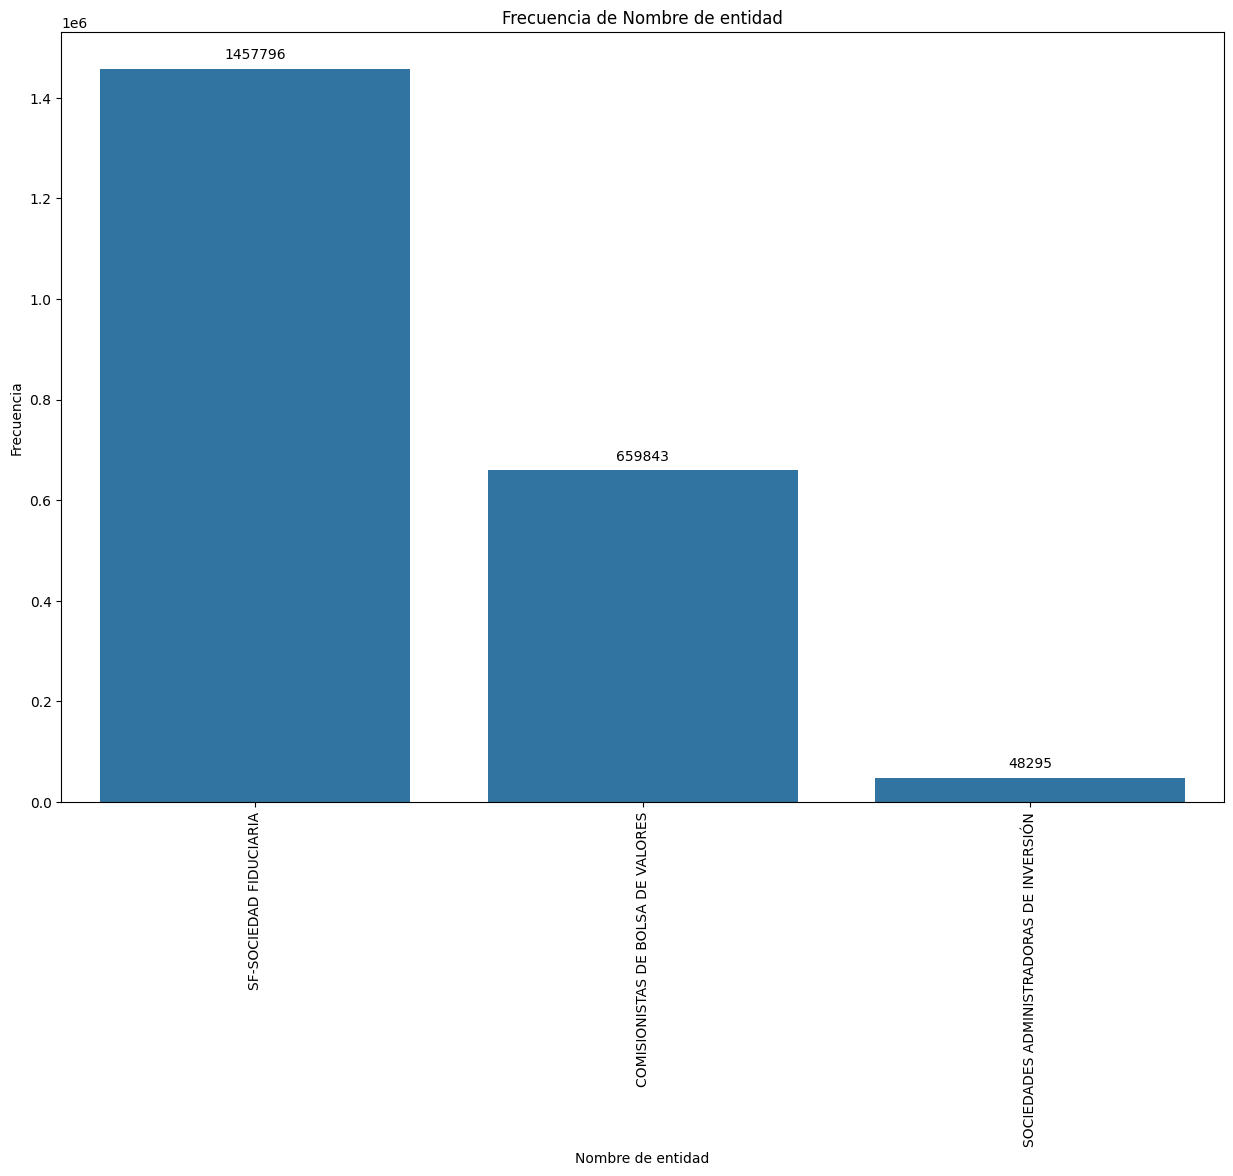

In [27]:
# Ordenar los datos por la cantidad de cada categoría
order = df_FondosInversion_colectiva['NOMBRE_TIPO_ENTIDAD'].value_counts().index

# Gráficos de barras
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=df_FondosInversion_colectiva, x='NOMBRE_TIPO_ENTIDAD',order=order)
plt.xticks(rotation=90)

# Añadir la cantidad en cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
# Títulos y etiquetas
plt.title('Frecuencia de Nombre de entidad')
plt.xlabel('Nombre de entidad')
plt.ylabel('Frecuencia')

plt.show()


Promedio de la rentabilidad total según NOMBRE TIPO ENTIDAD

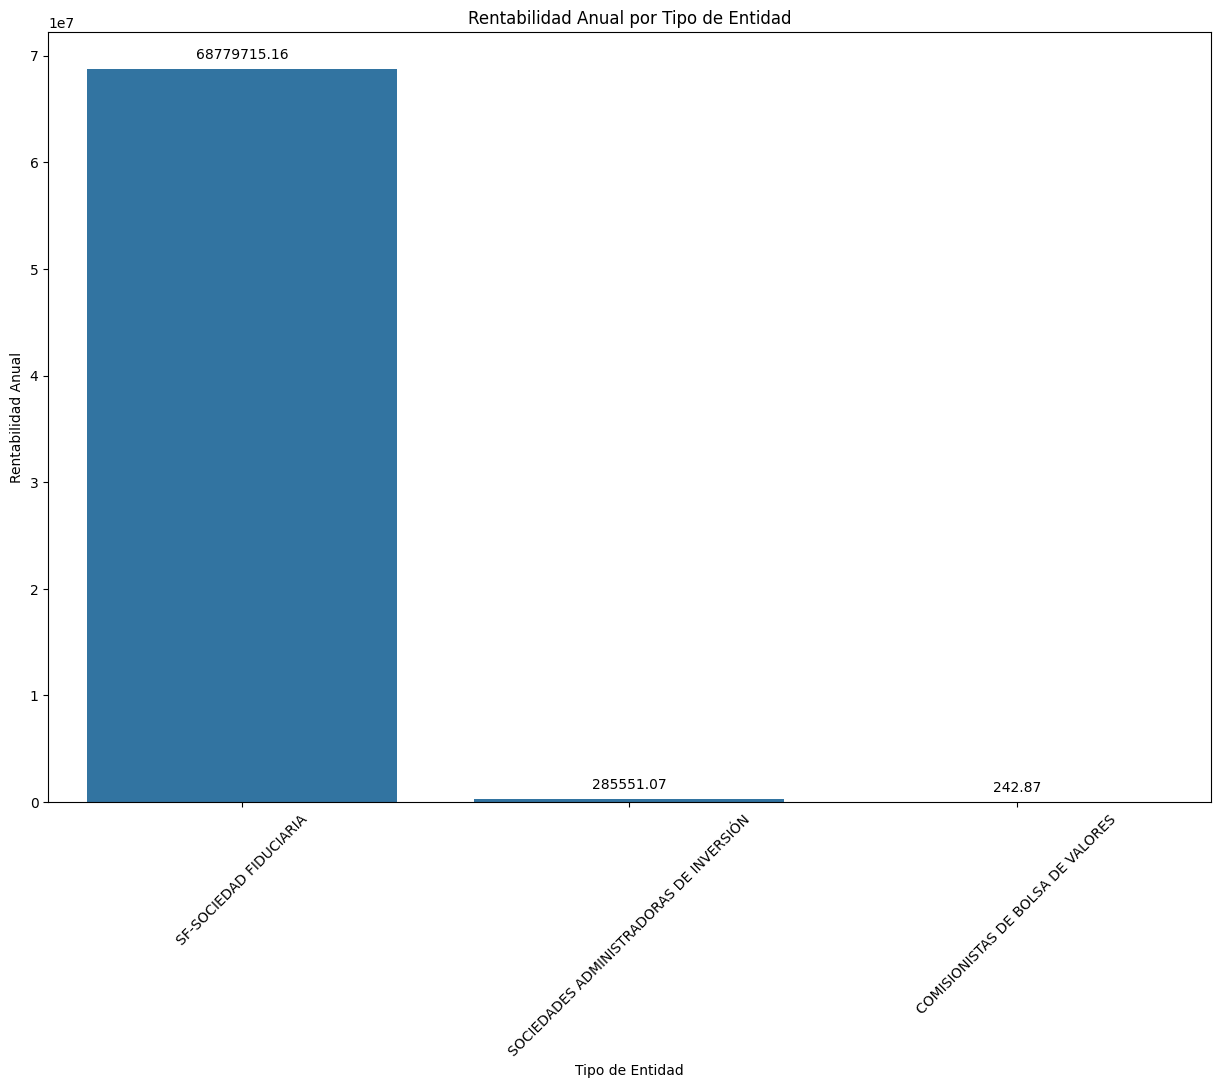

In [28]:
rentabilidad_prom = df_FondosInversion_colectiva.groupby('NOMBRE_TIPO_ENTIDAD')['RENTABILIDAD_ANUAL'].mean().reset_index()
rentabilidad_prom = rentabilidad_prom.sort_values(by='RENTABILIDAD_ANUAL', ascending=False)
plt.figure(figsize=(15, 10))
ax = sns.barplot(data=rentabilidad_prom, x='NOMBRE_TIPO_ENTIDAD', y='RENTABILIDAD_ANUAL')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
# Títulos y etiquetas
plt.title('Rentabilidad Anual por Tipo de Entidad')
plt.xlabel('Tipo de Entidad')
plt.ylabel('Rentabilidad Anual')
plt.xticks(rotation=45) 
plt.show()

In [29]:
frecuencia_entidades = df_FondosInversion_colectiva['NOMBRE_TIPO_ENTIDAD'].value_counts().reset_index()

# Renombrar las columnas para mejor legibilidad
frecuencia_entidades.columns = ['Nombre de tipo entidad', 'Frecuencia']

# Crear gráfico de pastel
fig = px.pie(names=frecuencia_entidades['Nombre de tipo entidad'], 
             values=frecuencia_entidades['Frecuencia'],
             title='Proporción de tipos de entidades')

fig.update_layout(height=600, width=800)

# Mostrar gráfico
fig.show()

*Conteo de valores atipicos*

In [30]:
columns_num = df_FondosInversion_colectiva.select_dtypes(include=['float64'])
Q1 = columns_num.quantile(0.25)
Q3 = columns_num.quantile(0.75)
IQR = Q3 - Q1

outliers = ((columns_num < (Q1 - 1.5 * IQR)) | (columns_num > (Q3 + 1.5 * IQR))).sum()
print(outliers)

RENDIMIENTOS_ABONADOS                               458925
PRECIERRE_FONDO_DIA_T                               291292
NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR    306852
VALOR_UNIDAD_OPERACIONES_DIA_T                      355657
APORTES_RECIBIDOS                                   537670
RETIROS_REDENCIONES                                 534613
ANULACIONES                                         113154
VALOR_FONDO_CIERRE_DIA_T                            291274
NUMERO_INVERSIONISTAS                               376665
RENTABILIDAD_DIARIA                                 387413
RENTABILIDAD_MENSUAL                                397846
RENTABILIDAD_SEMESTRAL                              281662
RENTABILIDAD_ANUAL                                  247519
dtype: int64


# Eliminación y renombre de columnas

Eliminación de columnas poco relevantes

In [31]:
# Eliminar columnas que no son necesarias
columnas_a_eliminar = [
                        'TIPO_ENTIDAD', 'CODIGO_ENTIDAD', 'TIPO_NEGOCIO', 'NOMBRE_TIPO_PATRIMONIO', 'SUBTIPO_NEGOCIO', 
                        'CODIGO_NEGOCIO', 'PRINCIPAL_COMPARTIMENTO' , 'TIPO_PARTICIPACION', 'PRECIERRE_FONDO_DIA_T', 
                        'NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR','RENTABILIDAD_DIARIA'
                        ]

try:
    df_FondosInversion_colectiva_new = df_FondosInversion_colectiva.drop(columns=columnas_a_eliminar)
    print("Las columnas seleccionadas se eliminaron con éxito")
except KeyError as e:
    print("Error al aliminar columnas")

Las columnas seleccionadas se eliminaron con éxito


Renombre de las Columnas:

*SF-SOCIEDAD FIDUCIARIA = SF* //
*COMISIONISTAS DE BOLSA DE VALORES = CBV* //
*SOCIEDADES ADMINISTRADORAS DE INVERSIÓN = SADI*

In [32]:
# Se renombra los datos de la columna 'NOMBRE_TIPO_ENTIDAD' 
try:
    df_FondosInversion_colectiva_new['NOMBRE_TIPO_ENTIDAD'] = df_FondosInversion_colectiva_new['NOMBRE_TIPO_ENTIDAD'].replace({
    'SF-SOCIEDAD FIDUCIARIA': 'SF',
    'COMISIONISTAS DE BOLSA DE VALORES': 'CBV',
    'SOCIEDADES ADMINISTRADORAS DE INVERSIÓN': 'SADI'
})
    print("Se renombraron los datos de la columna NOMBRE_TIPO_ENTIDAD con exito")
except Exception as e:
     print(f"Ocurrió un error: {e}")

Se renombraron los datos de la columna NOMBRE_TIPO_ENTIDAD con exito


## Validación de la cantidad de digitos por columnas de tipo float

Longitud de los valores de la "RENTABILIDAD_MENSUAL"

In [33]:
# Medir el largo de la parte entera de cada número en la columna 'numeros'
df_FondosInversion_colectiva_new['LARGO_M'] = df_FondosInversion_colectiva_new['RENTABILIDAD_MENSUAL'].apply(lambda x: len(str(abs(int(x)))))

# Clasificar y contar los números por su longitud
conteo_por_largo = df_FondosInversion_colectiva_new.groupby('LARGO_M').size().reset_index(name='conteo')

print(conteo_por_largo)

    LARGO_M   conteo
0         1  1306450
1         2   783468
2         3    62592
3         4     7804
4         5     2091
5         6      858
6         7      506
7         8      183
8         9      243
9        10      557
10       11      156
11       12      170
12       13      101
13       14       86
14       15      238
15       16       36
16       17        3
17       18       83
18       19       67
19       20       43
20       21        6
21       22        4
22       23       12
23       24       23
24       25        8
25       26        1
26       27       16
27       29        8
28       30       21
29       31      100


Longitud de los valores de la "RENTABILIDAD_SEMESTRAL"

In [34]:
# Medir el largo de la parte entera de cada número en la columna 'numeros'
df_FondosInversion_colectiva_new['LARGO_S'] = df_FondosInversion_colectiva_new['RENTABILIDAD_SEMESTRAL'].apply(lambda x: len(str(abs(int(x)))))

# Clasificar y contar los números por su longitud
conteo_por_largo = df_FondosInversion_colectiva_new.groupby('LARGO_S').size().reset_index(name='conteo')

print(conteo_por_largo)

    LARGO_S   conteo
0         1  1365064
1         2   768830
2         3    25644
3         4     2981
4         5     1999
5         6      439
6         7      223
7         8      238
8         9      513
9        12        1
10       15        1
11       23        1


Longitud de los valores de la "RENTABILIDAD_ANUAL"

In [35]:
# Medir el largo de la parte entera de cada número en la columna 'numeros'
df_FondosInversion_colectiva_new['LARGO_A'] = df_FondosInversion_colectiva_new['RENTABILIDAD_ANUAL'].apply(lambda x: len(str(abs(int(x)))))

# Clasificar y contar los números por su longitud
conteo_por_largo = df_FondosInversion_colectiva_new.groupby('LARGO_A').size().reset_index(name='conteo')

print(conteo_por_largo)

   LARGO_A   conteo
0        1  1483323
1        2   660389
2        3    17728
3        4     2906
4        5      493
5        6     1091
6       11        2
7       12        1
8       15        1


Filtrado de validaciones

In [36]:
df_FondosInversion_colectiva_new[df_FondosInversion_colectiva_new['LARGO_M']==31]

,FECHA_CORTE,NOMBRE_TIPO_ENTIDAD,NOMBRE_ENTIDAD,NOMBRE_SUBTIPO_PATRIMONIO,NOMBRE_PATRIMONIO,RENDIMIENTOS_ABONADOS,VALOR_UNIDAD_OPERACIONES_DIA_T,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL,LARGO_M,LARGO_S,LARGO_A
2021177,2021-01-18,SF,Alianza Fiduciaria S.A.,FONDOS DE CAPITAL PRIVADO,FONDO DE CAPITAL PRIVADO RUTA DEL SOL COMPARTI...,662.0,4505.6,0.0,0.0,0.0,23104511625.6,1.0,5382676172793999843760571154432.0,110927413.3,92275.0,31,9,5
2021486,2021-01-07,SF,Alianza Fiduciaria S.A.,FONDOS DE CAPITAL PRIVADO,FONDO DE CAPITAL PRIVADO RUTA DEL SOL COMPARTI...,3366.4,5236.2,0.0,0.0,0.0,64567068442.6,1.0,1006343365061999995209578971136.0,248868032.1,132724.8,31,9,6
2022574,2021-01-10,SF,Alianza Fiduciaria S.A.,FONDOS DE CAPITAL PRIVADO,FONDO DE CAPITAL PRIVADO RUTA DEL SOL COMPARTI...,5483.5,0.3,0.0,0.0,0.0,70644724722.0,5.0,2562190162390000062881784135680.0,727737.9,2520.0,31,6,4
2022703,2020-12-31,SF,Alianza Fiduciaria S.A.,FONDOS DE CAPITAL PRIVADO,FONDO DE CAPITAL PRIVADO RUTA DEL SOL COMPARTI...,6666.2,0.3,0.0,0.0,0.0,70644750999.3,5.0,6435146136200000167149035323392.0,727737.9,2522.7,31,6,4
2024822,2021-01-28,SF,Alianza Fiduciaria S.A.,FONDOS DE CAPITAL PRIVADO,FONDO DE CAPITAL PRIVADO RUTA DEL SOL COMPARTI...,-904879.6,4505.4,0.0,0.0,0.0,23103504860.7,1.0,5365105175259999750847840911360.0,110766850.2,92205.0,31,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154883,2021-01-28,SF,Alianza Fiduciaria S.A.,FONDOS DE CAPITAL PRIVADO,FONDO DE CAPITAL PRIVADO RUTA DEL SOL COMPARTI...,-4063925.6,0.3,0.0,0.0,0.0,70596038496.9,5.0,2045282573607999996849714888704.0,1826512.5,2509.6,31,7,4
2158808,2021-01-16,SF,Alianza Fiduciaria S.A.,FONDOS DE CAPITAL PRIVADO,FONDO DE CAPITAL PRIVADO RUTA DEL SOL COMPARTI...,1765.2,5236.2,0.0,0.0,0.0,64566780256.7,1.0,1570563869550000128891012775936.0,253342275.9,132494.1,31,9,6
2160709,2021-01-26,SF,Alianza Fiduciaria S.A.,FONDOS DE CAPITAL PRIVADO,FONDO DE CAPITAL PRIVADO RUTA DEL SOL COMPARTI...,3017.3,5236.2,0.0,0.0,0.0,64566507132.3,1.0,1555759960754999999626020388864.0,252696216.0,132278.7,31,9,6
2160769,2021-01-25,SF,Alianza Fiduciaria S.A.,FONDOS DE CAPITAL PRIVADO,FONDO DE CAPITAL PRIVADO RUTA DEL SOL COMPARTI...,3739.0,5236.2,0.0,0.0,0.0,64566504114.9,1.0,1556930135289000055399168081920.0,252747131.4,132299.1,31,9,6


# Filtros para Eliminar las filas que contienen Datos atipicos o numeros demasiado extensos

In [37]:
df_filtrado = df_FondosInversion_colectiva_new[df_FondosInversion_colectiva_new['LARGO_M'] <= 2]

In [38]:
df_filtrado = df_filtrado[df_filtrado['LARGO_S'] <= 2]

In [39]:
df_filtrado = df_filtrado[df_filtrado['LARGO_A'] <= 2]

Verificación de los registros eliminados por longitud

In [40]:
print(df_filtrado['LARGO_M'].value_counts())
print(df_filtrado['LARGO_S'].value_counts())
print(df_filtrado['LARGO_A'].value_counts())

LARGO_M
1    1293583
2     769375
Name: count, dtype: int64
LARGO_S
1    1347681
2     715277
Name: count, dtype: int64
LARGO_A
1    1452425
2     610533
Name: count, dtype: int64


Inversionistas

In [41]:

df_filtrado['LARGO_I'] = df_filtrado['NUMERO_INVERSIONISTAS'].apply(lambda x: len(str(abs(int(x)))))

# Clasificar y contar los números por su longitud
conteo_por_largo = df_filtrado.groupby('LARGO_I').size().reset_index(name='conteo')

print(conteo_por_largo)

   LARGO_I  conteo
0        1  877271
1        2  548179
2        3  375642
3        4  208661
4        5   42305
5        6   10899
6       10       1


In [42]:
df_filtrado = df_filtrado[df_filtrado['LARGO_I'] <= 4]

In [43]:
df_filtrado['LARGO_I'].value_counts()

LARGO_I
1    877271
2    548179
3    375642
4    208661
Name: count, dtype: int64

In [46]:
frecuencia_entidades = df_filtrado['LARGO_I'].value_counts().reset_index()

# Renombrar las columnas para mejor legibilidad
frecuencia_entidades.columns = ['Largo I','Frecuencia']

# Crear gráfico de pastel
fig = px.pie(names=frecuencia_entidades['Largo I'], 
            values=frecuencia_entidades['Frecuencia'],
            title='Proporción de tipos de entidades')

fig.update_layout(height=600, width=800)

# Mostrar gráfico
fig.show()


In [47]:

df_filtrado['LARGO_I'] = df_filtrado['NUMERO_INVERSIONISTAS'].apply(lambda x: len(str(abs(int(x)))))

# Clasificar y contar los números por su longitud
conteo_por_largo = df_filtrado.groupby('LARGO_I').size().reset_index(name='conteo')

print(conteo_por_largo)

   LARGO_I  conteo
0        1  877271
1        2  548179
2        3  375642
3        4  208661


Rendimientos abonados

In [48]:
# Medir el largo de la parte entera de cada número en la columna 'numeros'
df_filtrado['LARGO_AB'] = df_filtrado['RENDIMIENTOS_ABONADOS'].apply(lambda x: len(str(abs(int(x)))))

# Clasificar y contar los números por su longitud
conteo_por_largo = df_filtrado.groupby('LARGO_AB').size().reset_index(name='conteo')

print(conteo_por_largo)



    LARGO_AB  conteo
0          1   95559
1          2    9486
2          3   30268
3          4   71242
4          5  152678
5          6  354025
6          7  602934
7          8  519701
8          9  154380
9         10   16675
10        11    2652
11        12     153


In [49]:
df_filtrado = df_filtrado[df_filtrado['LARGO_AB'] <= 11]

VALOR_UNIDAD_OPERACIONES_DIA_T

In [50]:
# Medir el largo de la parte entera de cada número en la columna 'numeros'
df_filtrado['LARGO_VUOD'] = df_filtrado['VALOR_UNIDAD_OPERACIONES_DIA_T'].apply(lambda x: len(str(abs(int(x)))))

# Clasificar y contar los números por su longitud
conteo_por_largo = df_filtrado.groupby('LARGO_VUOD').size().reset_index(name='conteo')

print(conteo_por_largo)

   LARGO_VUOD   conteo
0           1    30758
1           2     9144
2           3    18078
3           4   423122
4           5  1433561
5           6    66212
6           7    28596
7           8      129


In [51]:
df_filtrado = df_filtrado[df_filtrado['LARGO_VUOD'] <= 8]

RETIROS_REDENCIONES

In [52]:
# Medir el largo de la parte entera de cada número en la columna 'numeros'
df_filtrado['LARGO_RR'] = df_filtrado['RETIROS_REDENCIONES'].apply(lambda x: len(str(abs(int(x)))))

# Clasificar y contar los números por su longitud
conteo_por_largo = df_filtrado.groupby('LARGO_RR').size().reset_index(name='conteo')

print(conteo_por_largo)

    LARGO_RR   conteo
0          1  1500402
1          2     3937
2          3      694
3          4     1359
4          5     3561
5          6    14102
6          7    43379
7          8    82130
8          9   115490
9         10   142031
10        11    94330
11        12     8178
12        13        6
13        14        1


In [53]:
df_filtrado = df_filtrado[df_filtrado['LARGO_RR'] <= 12]

Anulaciones

In [54]:
# Medir el largo de la parte entera de cada número en la columna 'numeros'
df_filtrado['LARGO_AN'] = df_filtrado['ANULACIONES'].apply(lambda x: len(str(abs(int(x)))))

# Clasificar y contar los números por su longitud
conteo_por_largo = df_filtrado.groupby('LARGO_AN').size().reset_index(name='conteo')

print(conteo_por_largo)

    LARGO_AN   conteo
0          1  1912635
1          2       64
2          3      220
3          4      569
4          5     1898
5          6     7483
6          7    18071
7          8    25633
8          9    27838
9         10    13196
10        11     1866
11        12      116
12        13        4


In [55]:
df_filtrado = df_filtrado[~df_filtrado['LARGO_AN'].isin([2, 3,4,12, 13])]


In [56]:
df_filtrado['LARGO_AN'].value_counts()

LARGO_AN
1     1912635
9       27838
8       25633
7       18071
10      13196
6        7483
5        1898
11       1866
Name: count, dtype: int64

Aportes recibidos

In [57]:
# Medir el largo de la parte entera de cada número en la columna 'numeros'
df_filtrado['LARGO_AR'] = df_filtrado['APORTES_RECIBIDOS'].apply(lambda x: len(str(abs(int(x)))))

# Clasificar y contar los números por su longitud
conteo_por_largo = df_filtrado.groupby('LARGO_AR').size().reset_index(name='conteo')

print(conteo_por_largo)

    LARGO_AR   conteo
0          1  1524306
1          2     4489
2          3      982
3          4     1450
4          5     3624
5          6    13779
6          7    39369
7          8    70649
8          9   102148
9         10   142855
10        11    96873
11        12     8074
12        13       22


In [58]:
df_filtrado = df_filtrado[~df_filtrado['LARGO_AR'].isin([2,3,4,5,13,12])]

In [59]:
df_filtrado['LARGO_AR'].value_counts()

LARGO_AR
1     1524306
10     142855
9      102148
11      96873
8       70649
7       39369
6       13779
Name: count, dtype: int64

Eliminacion de las columnas temporales

In [60]:
columnas_a_eliminar = [
                        'LARGO_M','LARGO_S','LARGO_A'
                        "LARGO_I",	"LARGO_AB",	"LARGO_VUOD",
                        "LARGO_RR","LARGO_AN",	"LARGO_AR"
                    ]

try:
    df_filtrado = df_filtrado.drop(columns=columnas_a_eliminar)
    print("Las columnas seleccionadas se eliminaron con éxito")
except KeyError as e:
    print("Error al aliminar columnas")

Error al aliminar columnas


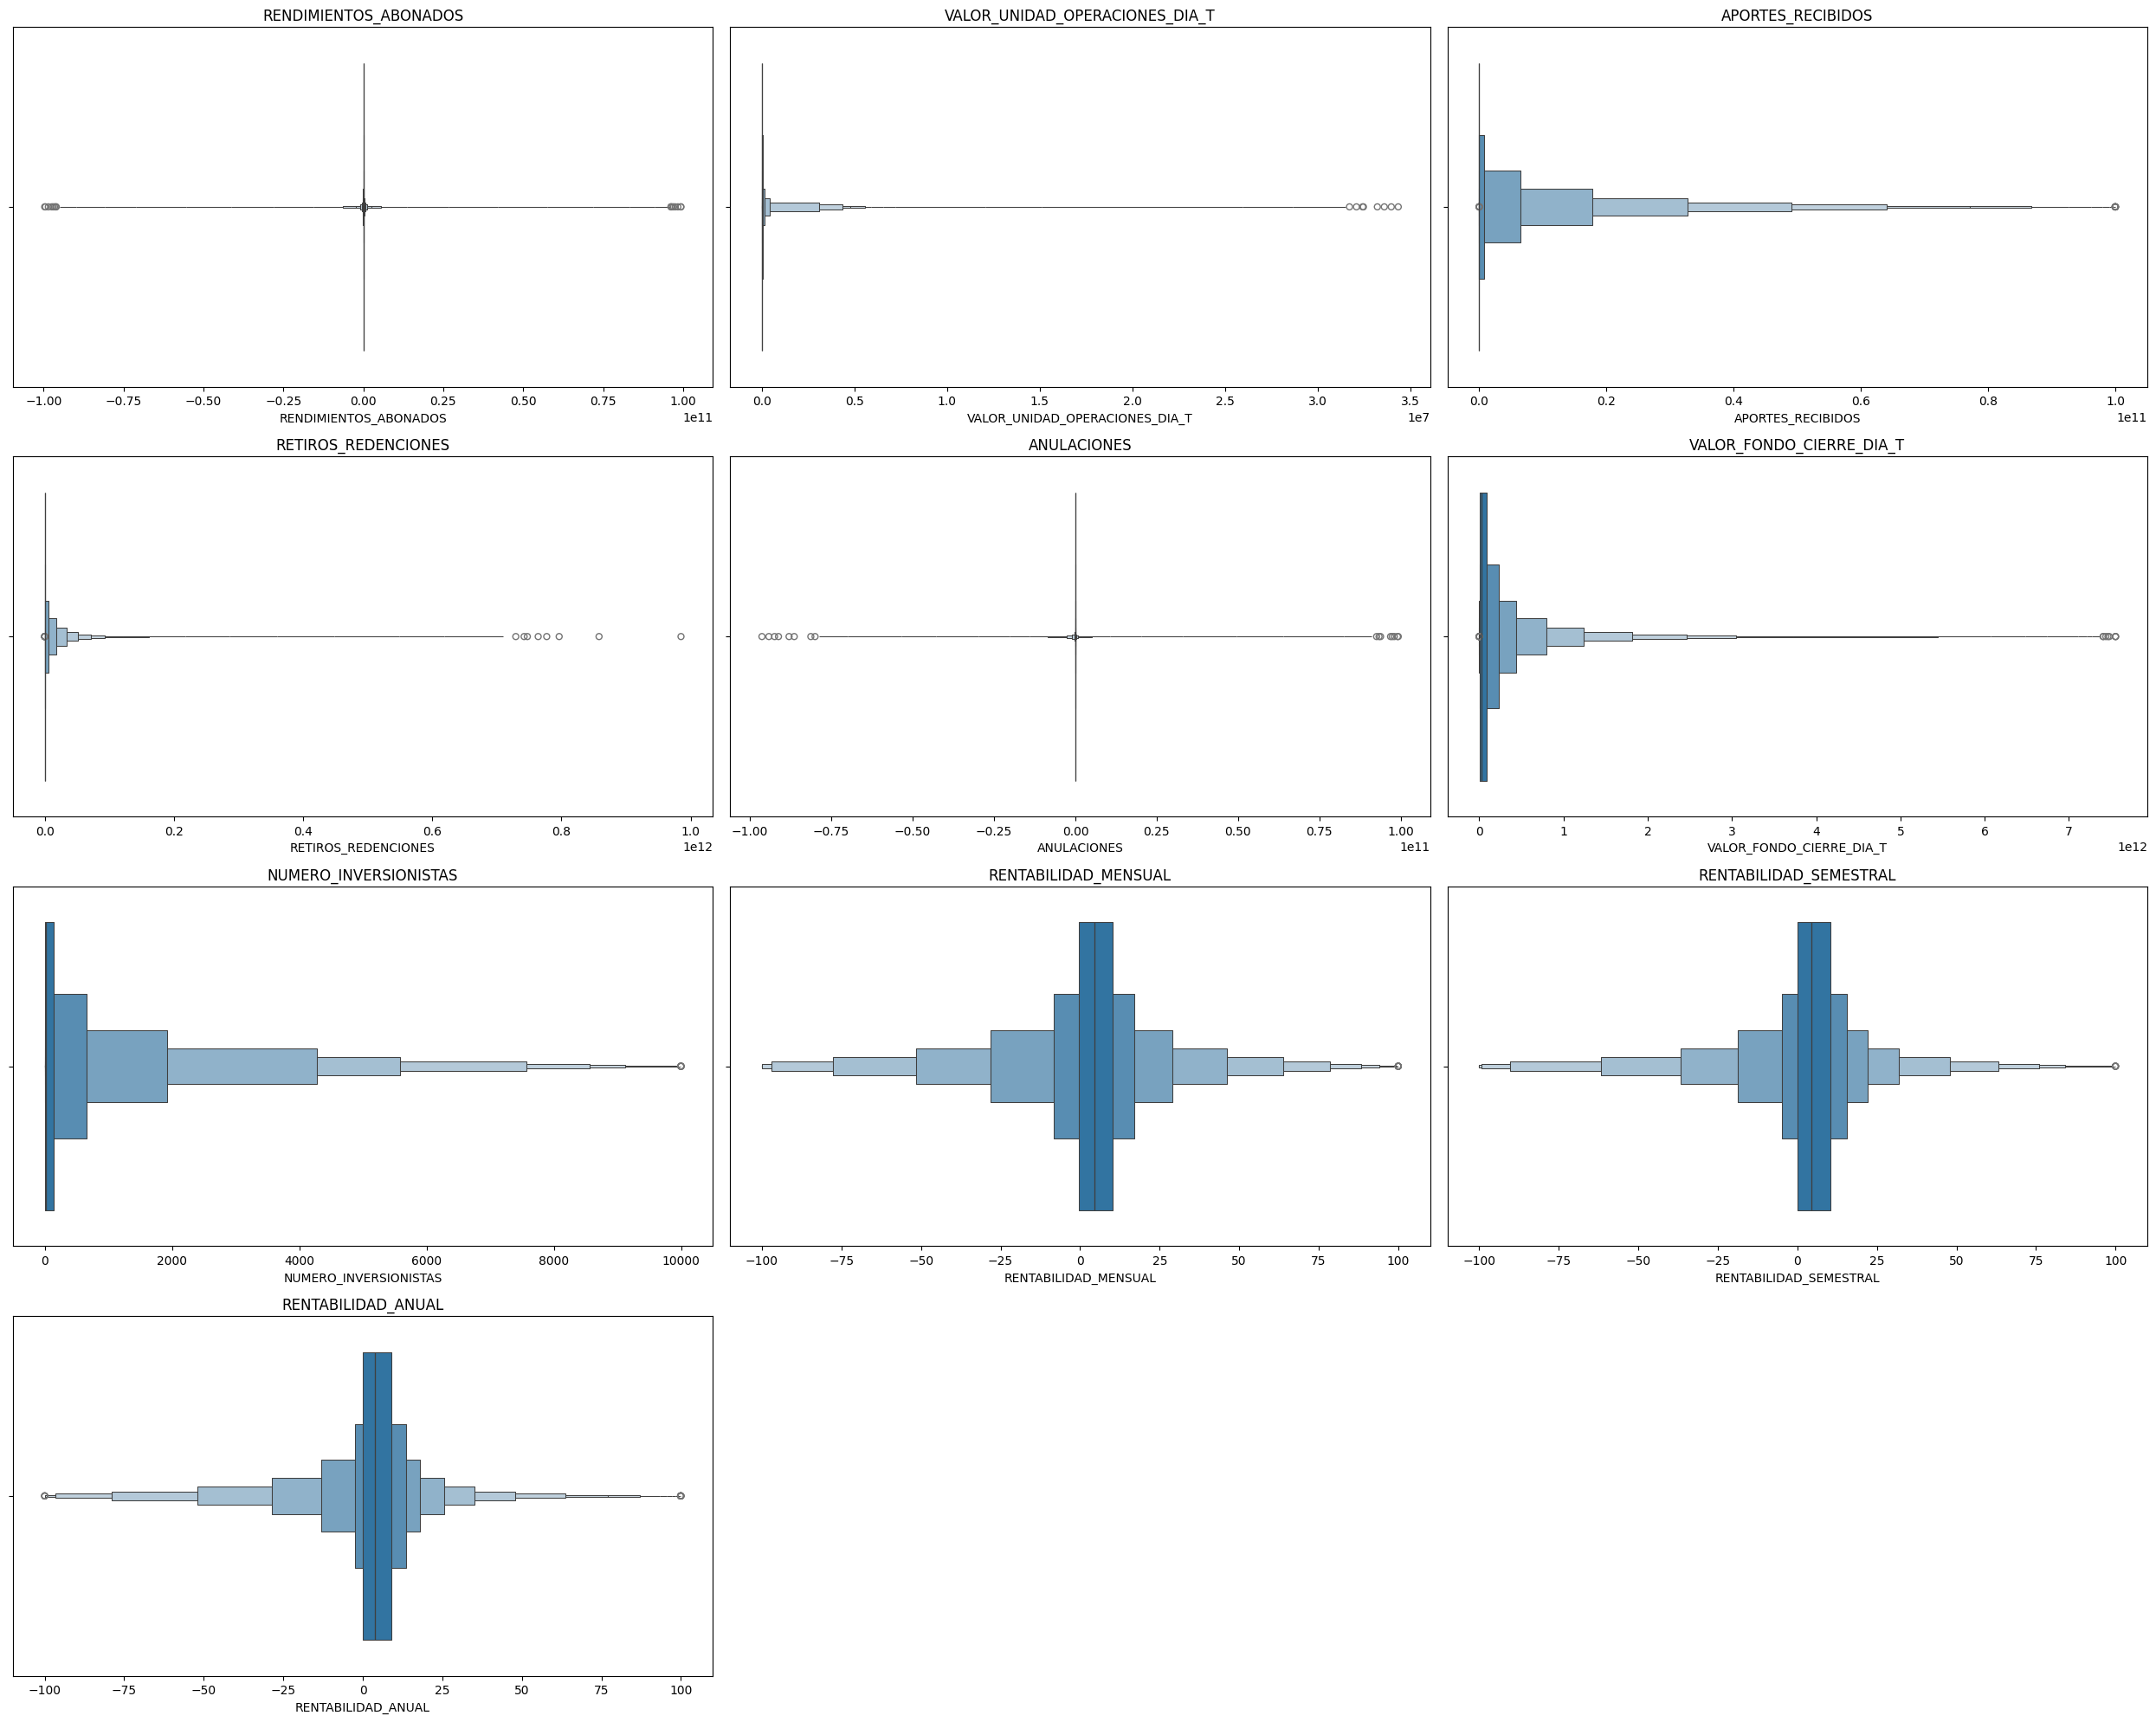

In [61]:
numeric_cols = df_filtrado.select_dtypes(include=['Float64']).columns

num_plots = len(numeric_cols)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Calcula cuántas filas se necesitan

plt.figure(figsize=(25, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxenplot(data=df_filtrado, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

Verificación del dataframe final

In [62]:
df_filtrado

,FECHA_CORTE,NOMBRE_TIPO_ENTIDAD,NOMBRE_ENTIDAD,NOMBRE_SUBTIPO_PATRIMONIO,NOMBRE_PATRIMONIO,RENDIMIENTOS_ABONADOS,VALOR_UNIDAD_OPERACIONES_DIA_T,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL,LARGO_M,LARGO_S,LARGO_A,LARGO_I,LARGO_AB,LARGO_VUOD,LARGO_RR,LARGO_AN,LARGO_AR
0,2020-07-20,SADI,Progresion Sociedad Administradora De Inversio...,FIC DE TIPO GENERAL,FONDO DE INVERSION COLECTIVA ABIERTO PROGRESIO...,308415.3,11813.7,0.0,0.0,0.0,6832704688.6,174.0,4.0,4.4,3.6,1,1,1,3,6,5,1,1,1
1,2021-09-12,SF,Sociedad Fiduciaria De Desarrollo Agropecuario...,FIC DE TIPO GENERAL,FONDO DE INVERSION COLECTIVA ABIERTO FIC 600,5909017.1,13326.5,0.0,0.0,0.0,105940936849.3,6.0,2.3,1.0,1.1,1,1,1,1,7,5,1,1,1
2,2022-12-09,SF,Skandia Fiduciaria S.A.,FIC DE TIPO GENERAL,FONDO DE INVERSIÓN COLECTIVA CON PACTO DE PERM...,-3079654.8,9521.4,0.0,0.0,0.0,1189565492.9,1.0,6.7,4.9,-3.4,1,1,1,1,7,4,1,1,1
4,2017-06-04,SF,Bbva Asset Management S.A. Sociedad Fiduciaria,FIC DE TIPO GENERAL,FIC ABIERTO BBVA FAM CON PARTICIPACIONES DIFER...,7491757.5,2224.9,0.0,3.2,0.0,44325566471.2,17.0,7.2,9.2,0.0,1,1,1,2,7,4,1,1,1
5,2021-04-27,SF,Alianza Fiduciaria S.A.,FIC DE TIPO GENERAL,FONDO ABIERTO ALIANZA,-14469336.4,155295.4,40813628392.1,50365792110.0,17215195207.2,289162132692.0,83.0,2.0,1.1,3.2,1,1,1,2,8,6,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165929,2019-06-25,SF,Fiduciaria Sura S.A.,FIC DE TIPO GENERAL,FIC CORPORATIVO II,3000592.2,15402.0,14540000000.0,13786967958.9,0.0,18283835774.3,19.0,4.5,6.3,6.3,1,1,1,2,7,5,11,1,11
2165930,2019-05-22,SF,Alianza Fiduciaria S.A.,FIC DE TIPO GENERAL,FONDO ABIERTO ALIANZA,81423066.4,144117.4,16602216877.8,22313379342.7,-10198765402.9,465195438702.2,22.0,4.4,4.0,3.9,1,1,1,2,8,6,11,11,11
2165931,2018-09-12,SF,Fiduciaria De Occidente S.A. - Fiduoccidente ...,FIC DE TIPO GENERAL,FONDO DE INVERSIÓN COLECTIVA ABIERTO CON PACTO...,3421103.4,2387.7,0.0,15000000.0,0.0,4479968228.4,117.0,0.8,-6.8,-1.6,1,1,1,3,7,4,8,1,1
2165932,2020-01-30,SF,Itaú Fiduciaria,FIC DE TIPO GENERAL,FONDO DE INVERSION COLECTIVA ABIERTO ITAU CORT...,18867439.8,4308605.6,2717348162.5,7697812764.1,-700000000.0,122054686562.2,1224.0,5.5,3.7,4.3,1,1,1,4,8,7,10,9,10


# Exportacion del dataFrame final para su uso en PowerBI

In [40]:
df_filtrado.to_csv("Rentabilidad_FIC.csv",index=False);